In [ ]:
from backward_process.generating import Generate
from neural_network.training_nn import TrainModel
from neural_network.neural_network import FeedForward
from initial_distributions.subclases import GenerateSubclasses
import torch

device = torch.device(f'cuda:{torch.cuda.current_device()}') if torch.cuda.is_available() else 'cpu'

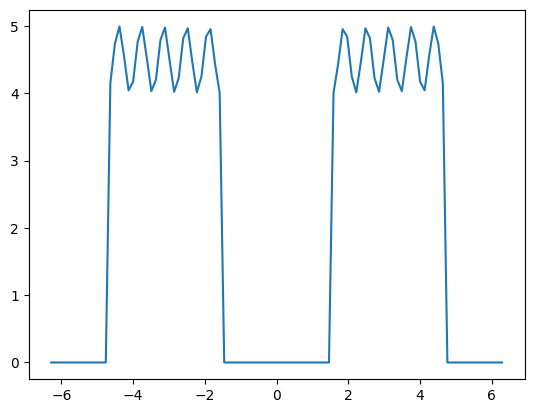

In [3]:
from matplotlib import pyplot as plt
from initial_distributions.subclases import SquaredSignal
import numpy as np

x = np.linspace(-2*np.pi, 2*np.pi, 100)
plt.plot(x, SquaredSignal(x))

(array([ 6., 13., 13., 16., 19., 23., 16., 15., 15., 17., 19., 13., 13.,
         8., 12., 26., 31., 18., 11., 13., 17., 15., 11., 18., 13., 13.,
         8., 13., 17., 15., 19.,  6., 11.,  5.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  3., 14., 11., 10., 10., 14., 21., 10., 10., 19., 18., 17.,
        14., 13., 15., 16., 20., 18., 20.,  7., 11.,  6., 13., 17., 20.,
        21., 18., 19., 10., 24., 18., 12., 20., 13.]),
 array([-4.70845106e+00, -4.61427121e+00, -4.52009135e+00, -4.42591150e+00,
        -4.33173164e+00, -4.23755178e+00, -4.14337193e+00, -4.04919207e+00,
        -3.95501222e+00, -3.86083236e+00, -3.76665251e+00, -3.67247265e+00,
        -3.57829280e+00, -3.48411294e+00, -3.38993309e+00, -3.29575323e+00,
        -3.20157338e+00, -3.10739352e+00, -3.01321367e+00, -2.91903381e+00,
        -2.82485395e+00, -2.73067410e+00, -2.63649424e

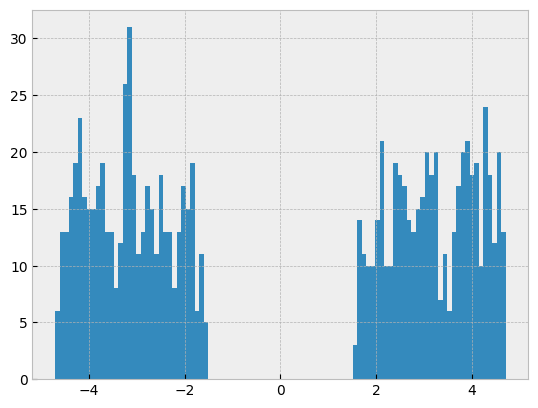

In [15]:
ndata = 1000
timesteps = 1000
plt.style.use('bmh')

initial_distributions = GenerateSubclasses(ndata)
plt.hist(initial_distributions, bins=100)

In [5]:
loss_hist_train, val_hist_train, scaler, test_loss = TrainModel(timesteps, ndata, initial_distribution=GenerateSubclasses)

Beginning training...


In [10]:
test_loss

0.37734413146972656

In [6]:
model = FeedForward(input_size=2,output_size=1,n_hidden_layers=2,depht=200).to(device)
state_dict = torch.load('model.pth',weights_only=False)
model.load_state_dict(state_dict)
model.eval();

In [7]:
Generate(timesteps, ndata, model=model, scaler=scaler)

Backward process started...


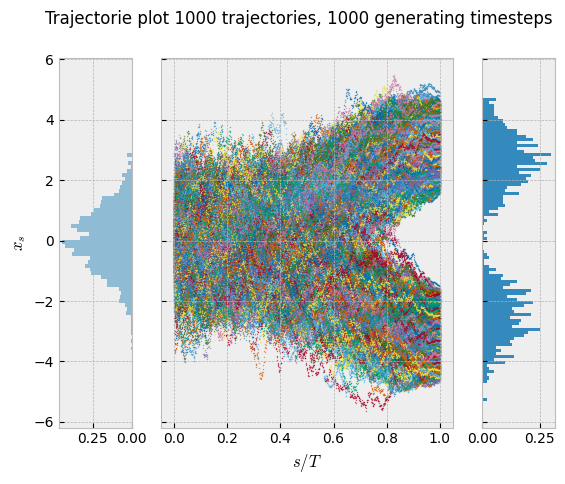

In [9]:
import numpy as np
import pandas as pd


name = str(ndata)+" trajectories, "+str(timesteps)+" generating timesteps"

reduced_timesteps = np.arange(timesteps)/timesteps

fig, ax = plt.subplots(ncols=3, width_ratios=[1, 4, 1], sharey=True)
ax[0].set_ylabel(r"$x_{s}$")
ax[1].set_xlabel(r"$s/T$")
fig.suptitle("Trajectorie plot "+name)

#scatter plot

distros = pd.read_csv("data/generated_data.csv", header=None).to_numpy()

for i in range(distros.shape[1]):

    ax[1].scatter(reduced_timesteps, distros[:,i], alpha = 0.5, s=0.3)

#histograms

hist0 = distros[0,:]
hist2= distros[800,:]

ax[0].hist(hist0, bins=50, orientation='horizontal', density=True, alpha=0.5)
ax[2].hist(hist2, bins=100, orientation='horizontal', density=True)

ax[0].invert_xaxis()

In [ ]:
from matplotlib.animation import FuncAnimation

# Parámetros del histograma
bins = 100
hist_range = (distros.min(), distros.max())

fig, ax = plt.subplots()
ax.set_xlim(hist_range)
#ax.set_ylim(0, 1) 
ax.set_xlabel("Valor")
ax.set_ylabel("Frecuencia")

# Histograma inicial
counts, bin_edges, patches = ax.hist(distros[0],bins=bins,range=hist_range,alpha=0.7)

title = ax.set_title("Frame 0")

def update(frame):
    ax.cla()  # limpia el eje
    ax.hist(distros[frame],bins=bins,range=hist_range,alpha=0.7)
    ax.set_xlim(hist_range)
   # ax.set_ylim(0, 1)
    ax.set_xlabel("Valor")
    ax.set_ylabel("Frecuencia")
    ax.set_title(f"Frame {frame}")


NameError: name 'distros' is not defined

In [ ]:
ani = FuncAnimation(fig,update,frames=timesteps,interval=10)

ani.save('histogram_evolution.gif', writer='pillow')